# Bank Direct Marketing

**Problem (Business understanding)** : Bank kesulitan mengajak customer untuk melakukan deposit. Bank melakukan proses marketing langsung melalui telepon atau telelepon seluler(jumlah spesifik).

**Business metrics** : 

    1.Menghemat dana pemasaran untuk mengajak customer untuk melakukan deposit

**Solusi(analytic approach)** :

    1.Membuat sistem yang dapat memprediksi apakah customer akan melakukan deposit atau tidak
    2.Membuat rekomendasi untuk tim marketing

# Data Science Methodology
    
    1. Business Understanding
    2. Data Preparation
    3. Exploratory Data Analysis (EDA)
    4. Data Modelling

# Data Preparation

In [1]:
#Import pandas and dataframe
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('C:/Users/Muhammad Hanif/Desktop/Data Science/Latihan Portofolio/Bank Direct Marketing/bank-full.csv')
df.rename(columns = {'y':'deposit'}, inplace = True)
print(df.head())
df['balance'] = df['balance'].astype('object')
df['age'] = df['age'].astype('object')
print(df.info())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data column

In [2]:
print('null data  :',(df.isnull().sum().sum())) #checking null data
print ('duplicate :',(df.duplicated(keep=False).sum().sum())) #checking duplicate data
print (df.loc[df.duplicated(keep=False),:])
df.drop_duplicates() #Drop Duplicate Data
# Understand the variables
variables = pd.DataFrame(columns=['Variable','Number of unique values', 'Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
# Join with the variables dataframe
print(variables.set_index('Variable'))
print(df.count())#cek jumlah data

null data  : 0
duplicate : 0
Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, deposit]
Index: []
          Number of unique values  \
Variable                            
age                            77   
job                            12   
marital                         3   
education                       4   
default                         2   
balance                      7168   
housing                         2   
loan                            2   
contact                         3   
day                            31   
month                          12   
duration                     1573   
campaign                       48   
pdays                         559   
previous                       41   
poutcome                        4   
deposit                         2   

                                                      Values  
Variable                    

In [3]:
client = ['age','job','marital','education','default','balance','loan','deposit','housing']
binary = ['default', 'housing', 'loan']
ordinal = ['education']
nominal = ['job', 'marital']
campaign = ['contact','day','month','duration']
df=df.replace(('other','unknown'),np.nan)
df['education'] = df['education'].fillna('secondary')
df['poutcome'] = df['poutcome'].fillna('failure')
df = df.dropna()

# Exploratory Data Analysis (EDA)

In [4]:
print (df.count()) #cek jumlah data

age          32014
job          32014
marital      32014
education    32014
default      32014
balance      32014
housing      32014
loan         32014
contact      32014
day          32014
month        32014
duration     32014
campaign     32014
pdays        32014
previous     32014
poutcome     32014
deposit      32014
dtype: int64


<AxesSubplot:xlabel='default'>

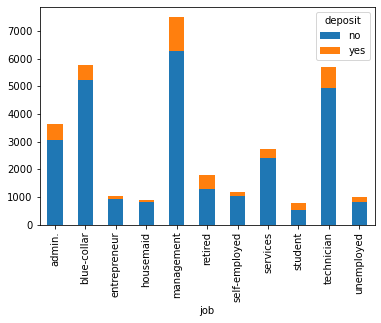

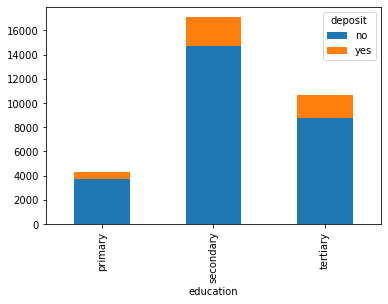

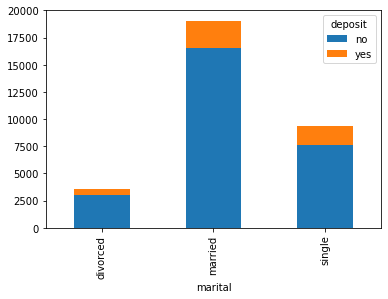

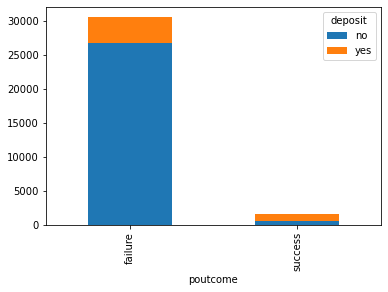

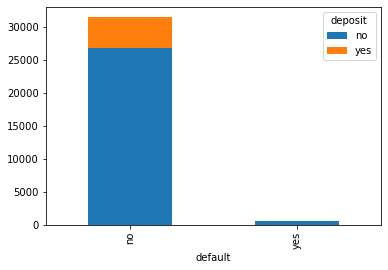

In [5]:
(df.groupby(['job','deposit'])['deposit'].size()).unstack().plot(kind='bar', stacked=True)
(df.groupby(['education','deposit'])['deposit'].size()).unstack().plot(kind='bar', stacked=True)
(df.groupby(['marital','deposit'])['deposit'].size()).unstack().plot(kind='bar', stacked=True)
(df.groupby(['poutcome','deposit'])['deposit'].size()).unstack().plot(kind='bar', stacked=True)
(df.groupby(['default','deposit'])['deposit'].size()).unstack().plot(kind='bar', stacked=True)

Tidak balance sehingga perlu dilakukan *oversampling*

**Business Insight** : 
    
    1.profesi manajemen,tehnician dan blue-collar banyak dihubungi oleh tim marketing
    2.tingkat pendidikan secondary banyak dihubungi oleh tim marketing
    3.pasangan berumah tangga banyak dihubungi oleh tim marketing
    4.tim marketing lebih banyak menghubungi pelanggan yang gagal pada marketing campaign sebelumnya
    5.tim marketing banyak menghubungi orang yang tidak memiliki masalah default

<AxesSubplot:xlabel='default'>

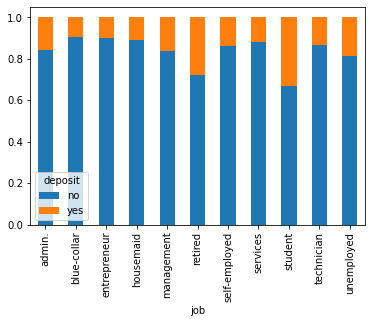

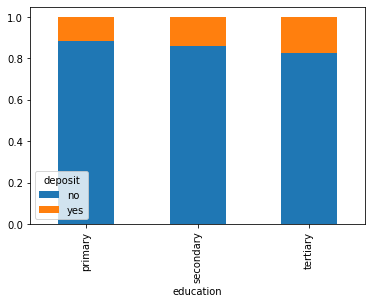

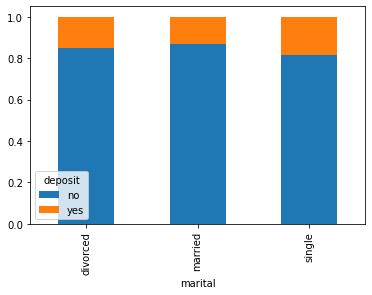

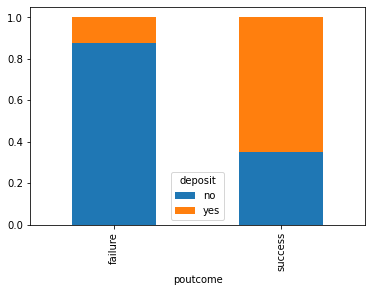

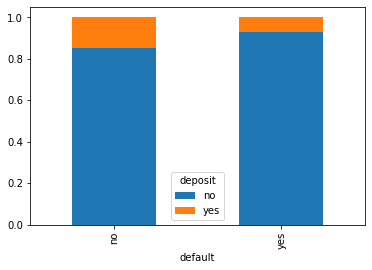

In [6]:
#Compairing categorical value and deposit
(df.groupby(['job','deposit'])['deposit'].size()/df.groupby(['job'])['deposit'].size()).unstack().plot(kind='bar', stacked=True)
(df.groupby(['education','deposit'])['deposit'].size()/df.groupby(['education'])['deposit'].size()).unstack().plot(kind='bar', stacked=True)
(df.groupby(['marital','deposit'])['deposit'].size()/df.groupby(['marital'])['deposit'].size()).unstack().plot(kind='bar', stacked=True)
(df.groupby(['poutcome','deposit'])['deposit'].size()/df.groupby(['poutcome'])['deposit'].size()).unstack().plot(kind='bar', stacked=True)
(df.groupby(['default','deposit'])['deposit'].size()/df.groupby(['default'])['deposit'].size()).unstack().plot(kind='bar', stacked=True)

**Business Insight** :

    1.profesi student dan retired banyak yang melakukan deposit
    2.tingkat pendidikan tertiary banyak melakukan deposit
    3.orang yang single banyak melakukan deposit
    4.orang yang berhasil mengikuti campaign marketing sebelumnya banyak melakukan deposit
    5.orang yang tidak memiliki isu default banyak melakukan deposit

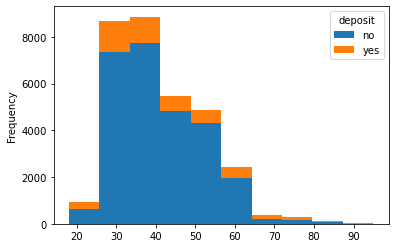

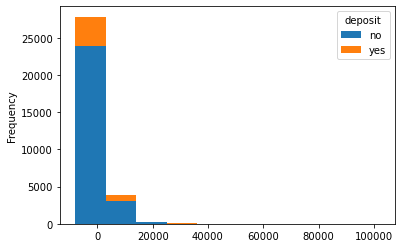

In [7]:
#Distribution of Age and Balance
df.pivot(columns='deposit').age.plot(kind = 'hist', stacked=True)
df.pivot(columns='deposit').balance.plot(kind = 'hist', stacked=True)
plt.show()

**Business Insight**

    1. Tim marketing banyak menghubungi orang dengan usia 30-40
    2. Tim marketing banyak menghubungi orang dengan balance <0 sampai 1000

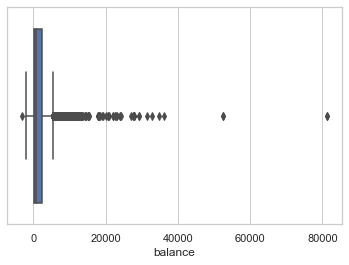

In [8]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df[df['deposit']=='yes']["balance"])

**Business Insight**

    1. Orang dengan balance 0-3000 banyak melakukan deposit

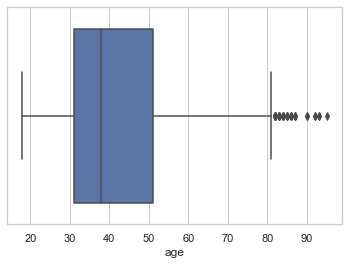

In [9]:
ax = sns.boxplot(x=df[df['deposit']=='yes']['age'])

**Business Insight**

    1. Orang dengan usia 30-50 banyak melakukan deposit

In [10]:
df.drop(df.index[df['balance'] < 0], inplace=True)

Adanya deposit < 0 dapat membuat rugi  bank

C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


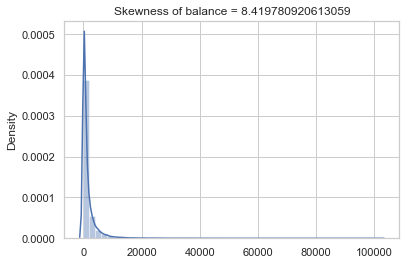

In [11]:
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
skewness = str(skew(df[df['deposit']=='yes']["balance"]))
sns.distplot(x=df['balance'])
plt.title("Skewness of balance"+" = "+skewness)
plt.show()

data balance orang-orang yang melakukan deposit menunjukan skewness >1 yang berarti highly positif skewness

**Business Insight**

    1. Tim marketing menghubungi orang yang memiliki balance >20000 akan tetapi sedikit dari mereka yang melakukan deposit

C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


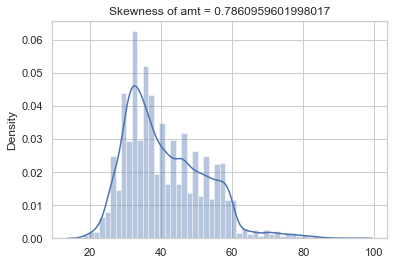

In [12]:
skewness = str(skew(df['age']))
sns.distplot(x=df['age'])
plt.title("Skewness of amt"+" = "+skewness)
plt.show()

data umur menunjukan skewness >0,5 tapi <1 yang menunjukan moderat positif skewness

**Business Insight**

    1. Tim marketing menghubungi orang yang berusia >60 tahun tapi mereka jarang melakukan deposit

In [13]:
df[df['deposit']=='yes'].pivot(columns='deposit').balance.describe()

deposit,yes
count,4564.000000
mean,1932.380368
std,3600.353493
min,0.000000
25%,257.000000
50%,831.500000
75%,2337.250000
max,81204.000000


**Business Insight**
rata-rata orang yang memiliki balance 1932 merupakan orang yang sering melakukan deposit

### Aktifitas Marketing

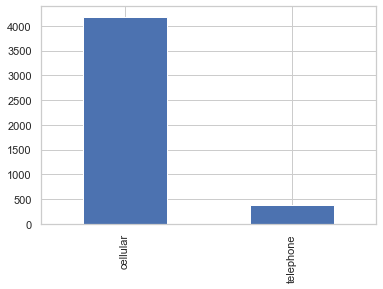

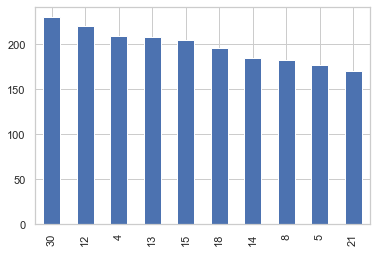

C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

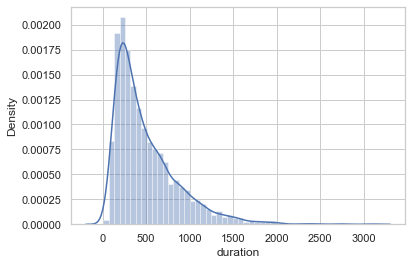

In [29]:
df[df['deposit']=='yes']['contact'].value_counts().plot(kind='bar')
plt.show()
df[df['deposit']=='yes']['day'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')
plt.show()
sns.distplot(df[df['deposit']=='yes']['duration'])

AxesSubplot(0.260833,0.125;0.503333x0.755)


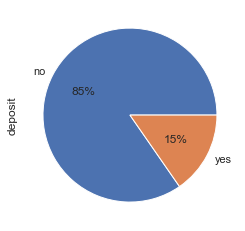

In [35]:
print((df['deposit'].value_counts()).plot(kind='pie',autopct='%1.0f%%'))

**Business Insight**

    1. Kontak dengan seluler lebih banyak melakukan deposit
    2. Durasi waktu optimum untuk menghubungi customer yaitu dari 300-600 detik

# Modelling

In [16]:
#Data Modelling
#Preparation
from sklearn.model_selection import train_test_split
df_client = df[client]
y = df_client['deposit']
X = df_client.drop('deposit',axis=1)

#nominal
def nominal_encode(df, columns):
    df = df.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df
X = nominal_encode(X,nominal)
#ordinal
def ordinal_encode(df, columns, orderings):
    df = df.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x) if str(x) != 'nan' else x)
    return df
education_ordering = ['primary', 'secondary', 'tertiary']
orderings = [education_ordering]
X = ordinal_encode(X, ordinal, orderings)
#binary
def binary_encode(df, columns, positive_label):
    df = df.copy()
    for column in columns:
        df[column] = df[column].apply(lambda x: 1 if x == positive_label else 0)
    return df
X = binary_encode(X, binary, 'yes')
#multicol antar variabel

In [17]:
print(X)
print(X.info())

       age  education  default  balance  loan  housing  admin.  blue-collar  \
12657   27          1        0       35     0        0       0            0   
12658   54          0        0      466     0        0       0            1   
12659   43          1        0      105     1        0       0            1   
12660   31          1        0       19     0        0       0            0   
12661   27          1        0      126     1        1       0            0   
...    ...        ...      ...      ...   ...      ...     ...          ...   
45206   51          2        0      825     0        0       0            0   
45207   71          0        0     1729     0        0       0            0   
45208   72          1        0     5715     0        0       0            0   
45209   57          1        0      668     0        0       0            1   
45210   37          1        0     2971     0        0       0            0   

       entrepreneur  housemaid  management  retired

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=21)

### SMOTE (Synthetic Minority Oversampling Technique)
teknik resampling dengan mengambil nilai mayoritas kemudian diduplikasi dengan nilai yang mendekati

In [19]:
#Split Train and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=21)
#SMOTE
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)#yang test gak perlu

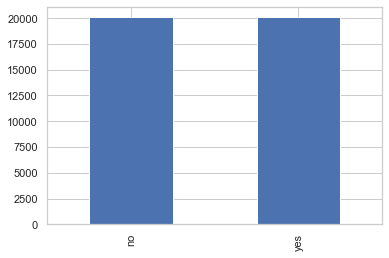

In [20]:
pd.Series(y_train).value_counts().plot.bar()

plt.show()

Data sudah balance

In [21]:
X_train

,age,education,default,balance,loan,housing,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,31,1,0,15187,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,39,1,0,1005,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,31,2,0,1812,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,31,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40183,28,1,0,169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40184,30,2,0,2538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
40185,60,2,0,4689,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
40186,31,1,0,230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [22]:
from sklearn.preprocessing import StandardScaler #normal = standar scaler skew = minmax outlier = robust
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()
X_train_col = X_train.copy()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

### Data Modelling

### Logistic Regression

In [23]:
#REGRESSION
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()


### Scoring Model
Confusion Matriks:

TP : Prediksi(benar) Test(benar)

TN : Prediksi(salah) Test (salah)

FP : Prediksi (benar) Test (salah)

FN : Prediksi (salah) Test (benar)


Accuracy : Jumlah proporsi prediksi yang tepat (TP+TN) dengan keseluruhan 

Prediksi (TP+FP+TN+FP)

Presisi : Jumlah proporsi prediksi yang benar (TP) dengan keseluruhan hasil yang benar (TP+FP)

Recall  : Jumlah proporsi hasil yang benar (TP) dengan keseluruhan prediksi yang positif (TP+FN)

Pada model ini karena digunakan untuk menghemat budget marketing. Jika model **salah memprediksi customer yang potensial** maka dapat **memboroskan budget marketing**. Sehingga pada kasus kali ini menggunakan parameter **recall** sebagai parameter 


confusion matrix : [[4808  264]
 [1063 4009]]
Recall: 0.790
accuracy : 0.8691837539432177


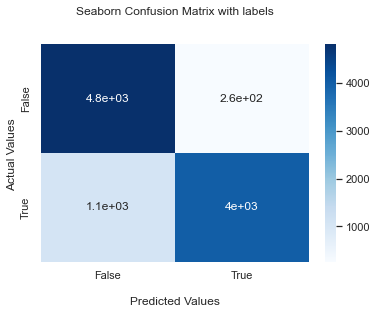

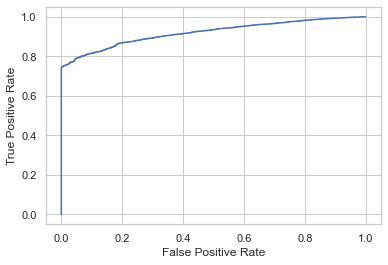

accuracy test : 0.8691837539432177
accuracy train : 0.8301483029760127


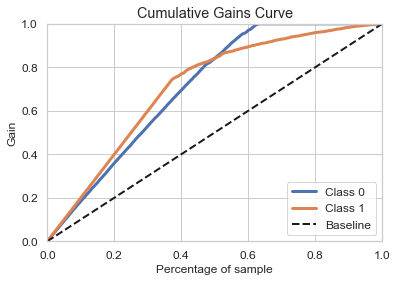

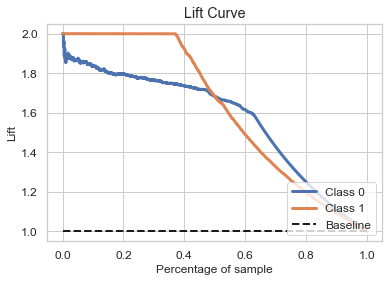

In [24]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
import scikitplot as skplt
y_pred = model.predict(X_test)

print ('confusion matrix :',confusion_matrix(y_test,y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
recall_logreg = recall_score(y_test, y_pred)
print ('accuracy :',accuracy_score(y_test,y_pred))

import seaborn as sns

ax = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
#ROC Curve
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#dicek overfitting atau underfitting
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#Evaluating Overfitting or Underfitting
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
print ('accuracy test :',accuracy_score(y_test,y_pred_test))
print ('accuracy train :',accuracy_score(y_train,y_pred_train))
overfitting_logreg = accuracy_score(y_test,y_pred_test) - accuracy_score(y_train,y_pred_train)
#Gain Chart
probas = model.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test,y_probas =probas)
plt.show()

#Lift Chart
skplt.metrics.plot_lift_curve(y_test,y_probas =probas)
plt.show()

## Random Forest Classifier

confusion matrix : [[4583  489]
 [ 875 4197]]
accuracy of model 0.8655362776025236


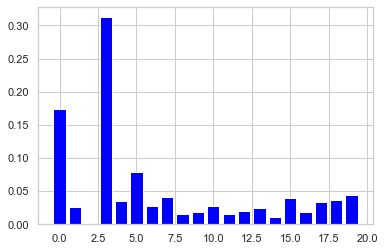

balance          0.312273
age              0.174345
housing          0.078822
single           0.043886
blue-collar      0.040718
technician       0.039132
married          0.035920
loan             0.035155
divorced         0.033252
admin.           0.028222
management       0.027796
education        0.026114
services         0.024061
self-employed    0.019544
unemployed       0.018664
housemaid        0.018452
retired          0.014953
entrepreneur     0.014822
student          0.011725
default          0.002145
dtype: float64


In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy',n_estimators=800,n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print ('confusion matrix :',confusion_matrix(y_test,y_pred))
print ('accuracy of model',accuracy_score(y_test,y_pred))
feature=model.feature_importances_
plt.bar(range(X_train.shape[1]),feature,color='blue',align='center')
plt.show()
feature_scores = pd.Series(model.feature_importances_, index=X_train_col.columns).sort_values(ascending=False)
print(feature_scores)

## Scoring Base Model Random Forest

confusion matrix : [[4583  489]
 [ 875 4197]]
Recall: 0.827
accuracy : 0.8655362776025236


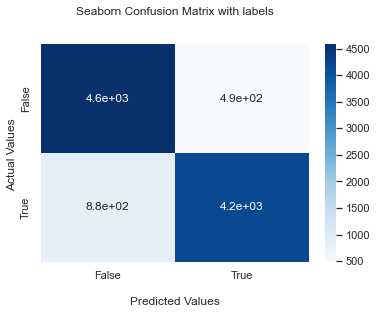

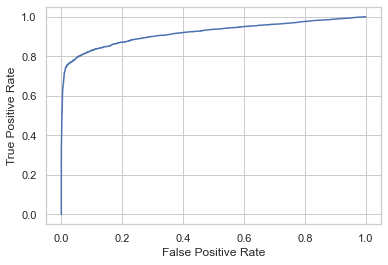

accuracy test : 0.8655362776025236
accuracy train : 0.9866378023290534


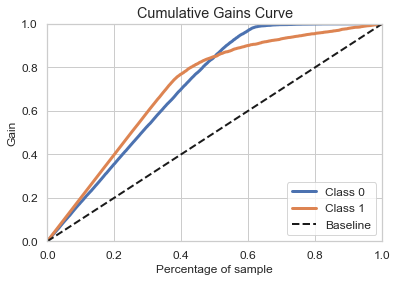

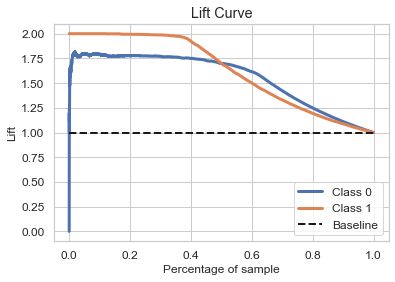

In [26]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
y_pred = model.predict(X_test)

print ('confusion matrix :',confusion_matrix(y_test,y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
recall_randomforest = recall_score(y_test, y_pred)
print ('accuracy :',accuracy_score(y_test,y_pred))
import seaborn as sns

ax = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
#ROC Curve
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#dicek overfitting atau underfitting
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#Evaluating Overfitting or Underfitting
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
print ('accuracy test :',accuracy_score(y_test,y_pred_test))
print ('accuracy train :',accuracy_score(y_train,y_pred_train))
overfitting_random_forest = accuracy_score(y_test,y_pred_test) - accuracy_score(y_train,y_pred_train)
#Gain Chart
probas = model.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test,y_probas =probas)
plt.show()

#Lift Chart
skplt.metrics.plot_lift_curve(y_test,y_probas =probas)
plt.show()

### Feature Important Model

In [27]:
X_feature = X[['balance','age','housing','education','loan']]
X_train_new, X_test_new, y_train_new,y_test_new = train_test_split(X_feature,y,test_size=0.2, random_state=21)
X_train_new = scaler.fit_transform(X_train_new)
X_test_new = scaler.transform(X_test_new)
y_train_new = label_encoder.fit_transform(y_train_new)
y_test_new = label_encoder.transform(y_test_new)
model = RandomForestClassifier(criterion='entropy',n_estimators=800,n_jobs=-1)
model.fit(X_train_new,y_train_new)
y_pred_new = model.predict(X_test_new)
print (model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 800, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## Scoring Model Feature Important

confusion matrix : [[4659  413]
 [ 620  254]]
Recall: 0.291
accuracy : 0.8262697611839892


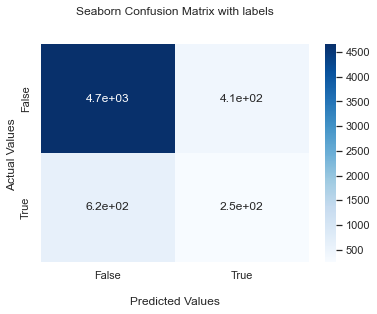

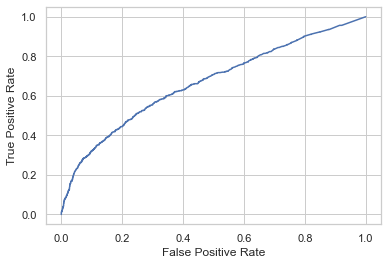

accuracy test : 0.8262697611839892
accuracy train : 0.9754456777665658


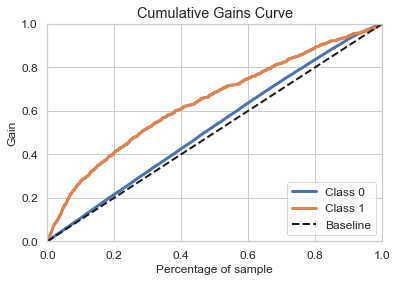

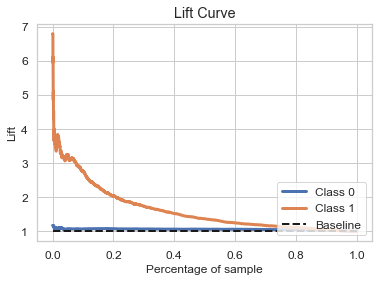

In [28]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
y_pred = model.predict(X_test_new)

print ('confusion matrix :',confusion_matrix(y_test_new,y_pred_new))
print('Recall: %.3f' % recall_score(y_test_new, y_pred_new))
recall_random_forest_fetimp = recall_score(y_test_new, y_pred_new)
print ('accuracy :',accuracy_score(y_test_new,y_pred_new))

import seaborn as sns

ax = sns.heatmap(confusion_matrix(y_test_new,y_pred_new), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
#ROC Curve
#define metrics
y_pred_proba = model.predict_proba(X_test_new)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_new,  y_pred_proba)
#dicek overfitting atau underfitting
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#Evaluating Overfitting or Underfitting
y_pred_test_new = model.predict(X_test_new)
y_pred_train_new = model.predict(X_train_new)
print ('accuracy test :',accuracy_score(y_test_new,y_pred_test_new))
print ('accuracy train :',accuracy_score(y_train_new,y_pred_train_new))
overfitting_random_forest_fetimp = accuracy_score(y_test_new,y_pred_test_new) - accuracy_score(y_train_new,y_pred_train_new)
#Gain Chart
probas = model.predict_proba(X_test_new)
skplt.metrics.plot_cumulative_gain(y_test_new,y_probas =probas)
plt.show()

#Lift Chart
skplt.metrics.plot_lift_curve(y_test_new,y_probas =probas)
plt.show()

In [ ]:
# HyperTuning Model
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]#n_estimators learning curve,kurang max depth
# Number of features to consider at every split
max_features = ['sqrt', 'log2', None]
# Minimum number of samples required to split a node
min_samples_split = [1,2,3,4,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4,5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
#Criterion
criterion = ['entropy']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}
# search across 100 different combinations, and use all available cores
model_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1,)
# Fit the random search model
model_random.fit(X_train,y_train)
model_random.best_params_

In [29]:
best_random = RandomForestClassifier(n_estimators= 600, min_samples_split= 3, min_samples_leaf= 1, max_features= None, criterion= 'entropy', bootstrap= True,n_jobs=-1)

Model Performance
recall of model 0.8261041009463722
confusion matrix : [[4583  489]
 [ 882 4190]]
Model Performance
recall of model 0.8308359621451105
confusion matrix : [[4613  459]
 [ 858 4214]]
Improvement of 0.57%.
accuracy test : 0.8701695583596214
accuracy train : 0.985916193888723


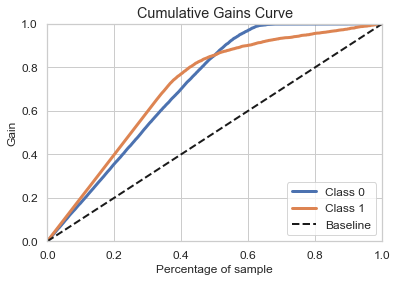

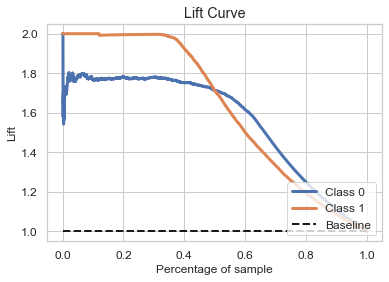

In [30]:
#Evaluate Hypertuning model
def evaluate(model, X_train,y_train):
    y_pred = model.predict(X_test)
    recall = recall_score(y_test,y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    print('Model Performance')
    print('recall of model',recall)
    print('confusion matrix :',confusion)
    
    return recall
#Using Base Model
base_model = RandomForestClassifier(criterion='entropy',n_estimators=800,n_jobs=-1)
base_model.fit(X_train,y_train)
base_recall = evaluate(base_model, X_test, y_test)
#Using Tuning Model
best_random.fit(X_train,y_train)
random_recall = evaluate(best_random, X_test, y_test)
y_pred = best_random.predict(X_test)
recall_randomforest_randomcv = recall_score(y_test,y_pred)
print('Improvement of {:0.2f}%.'.format( 100 * (random_recall - base_recall) / base_recall))
#Check Overfitting
y_pred_test = best_random.predict(X_test)
y_pred_train = best_random.predict(X_train)
print ('accuracy test :',accuracy_score(y_test,y_pred_test))
print ('accuracy train :',accuracy_score(y_train,y_pred_train))
overfitting_randomforest_randomcv = accuracy_score(y_test,y_pred_test) - accuracy_score(y_train,y_pred_train)
#Gain Chart
probas = best_random.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test,y_probas =probas)
plt.show()

#Lift Chart
skplt.metrics.plot_lift_curve(y_test,y_probas =probas)
plt.show()

In [41]:
best_grid = RandomForestClassifier(n_estimators= 600, min_samples_split= 5, min_samples_leaf= 1, max_features= None, criterion= 'entropy', bootstrap= True,n_jobs=-1)

Model Performance
recall of model 0.8264984227129337
confusion matrix : [[4656  416]
 [ 880 4192]]
Improvement of 0.05%.


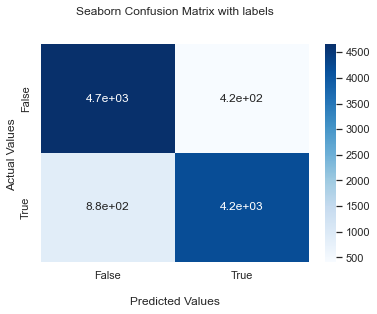

accuracy test : 0.8722397476340694
accuracy train : 0.9722802826714442


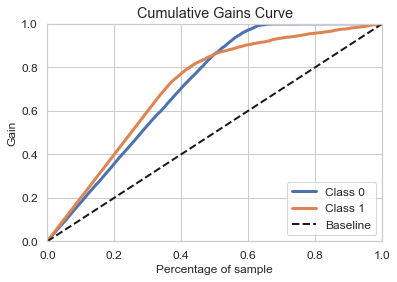

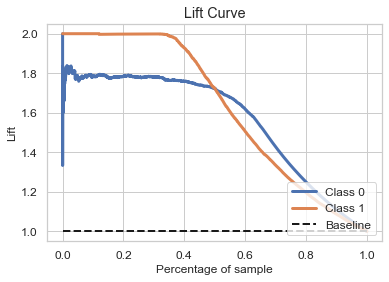

In [42]:
best_grid.fit(X_train,y_train)
grid_recall = evaluate(best_grid, X_test, y_test)
y_pred = best_grid.predict(X_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_recall - base_recall) / base_recall))
recall_randomforest_gridcv = recall_score(y_test,y_pred)
#confusion_matrix
ax = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
#Check Overfitting
y_pred_test = best_grid.predict(X_test)
y_pred_train = best_grid.predict(X_train)
print ('accuracy test :',accuracy_score(y_test,y_pred_test))
print ('accuracy train :',accuracy_score(y_train,y_pred_train))
overfitting_randomforest_gridcv = accuracy_score(y_test,y_pred_test)-accuracy_score(y_train,y_pred_train)
#Gain Chart
probas = best_grid.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test,y_probas =probas)
plt.show()

#Lift Chart
skplt.metrics.plot_lift_curve(y_test,y_probas =probas)
plt.show()

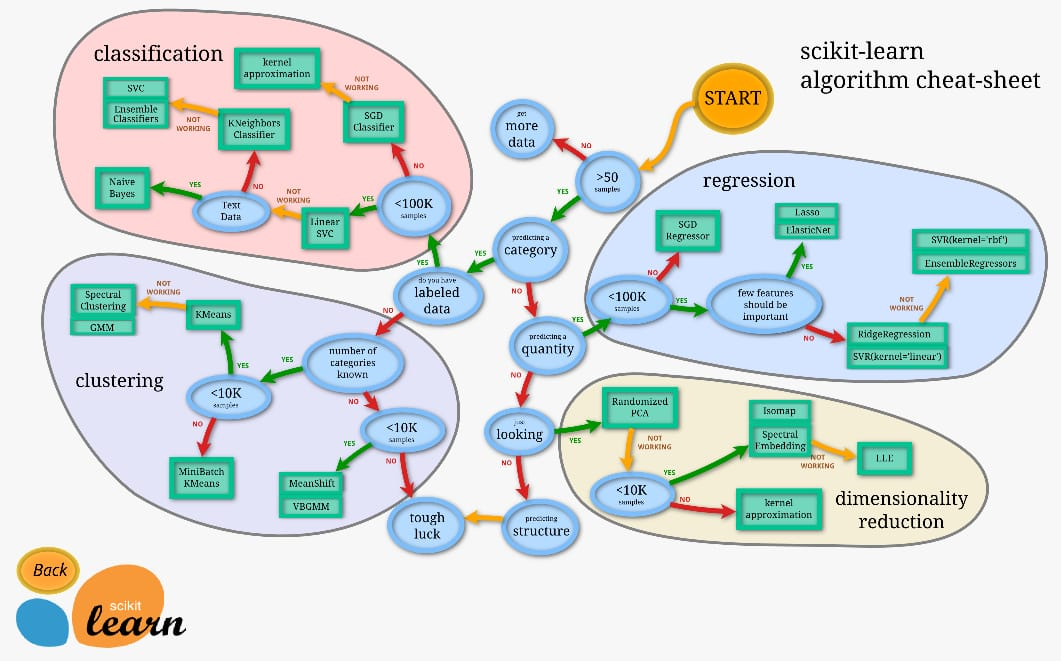

In [33]:
#LinearSVC
from sklearn.svm import LinearSVC
model_SVC = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
model_SVC.fit(X_train,y_train)
y_pred = model_SVC.predict(X_test)

C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


confusion matrix : [[4808  264]
 [1063 4009]]
Recall: 0.790
accuracy : 0.8691837539432177


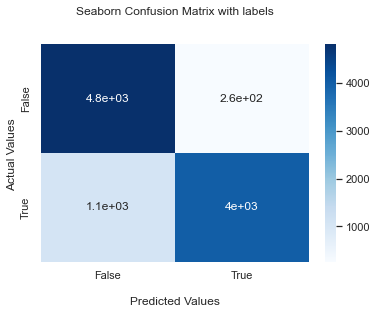

accuracy test : 0.8691837539432177
accuracy train : 0.8302976012740122


C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Muhammad Hanif\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


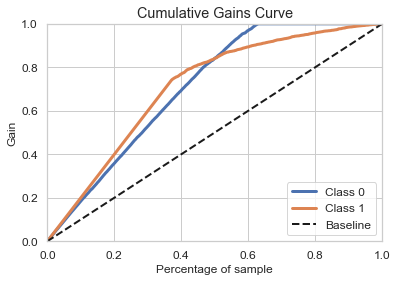

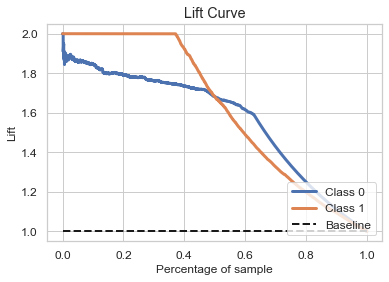

In [34]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
print ('confusion matrix :',confusion_matrix(y_test,y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print ('accuracy :',accuracy_score(y_test,y_pred))
recall_linearSVC = recall_score(y_test, y_pred)
import seaborn as sns

ax = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
#Evaluating Overfitting or Underfitting
y_pred_test = model_SVC.predict(X_test)
y_pred_train = model_SVC.predict(X_train)
print ('accuracy test :',accuracy_score(y_test,y_pred_test))
print ('accuracy train :',accuracy_score(y_train,y_pred_train))
overfitting_linearSVC = accuracy_score(y_test,y_pred_test) - accuracy_score(y_train,y_pred_train)
#Gain Chart
model_SVC_new = CalibratedClassifierCV(model_SVC)
model_SVC_new.fit(X_train,y_train)
probas = model_SVC_new.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test,y_probas =probas)
plt.show()
#Lift Chart
skplt.metrics.plot_lift_curve(y_test,y_probas =probas)
plt.show()

In [35]:
model_list = ['logreg','random forest','random forest feature important','random forest randomCV','random forest GridCV','linearSVC']
recall_array = np.array([recall_logreg,recall_randomforest,recall_random_forest_fetimp,recall_randomforest_randomcv,recall_randomforest_gridcv,recall_linearSVC])
recall_df = pd.DataFrame (recall_array,columns= ['recall'])
recall_df['model'] = model_list #model logreg, dct, randforest, xgboost
print(recall_df)

     recall                            model
0  0.790418                           logreg
1  0.827484                    random forest
2  0.290618  random forest feature important
3  0.830836           random forest randomCV
4  0.826301             random forest GridCV
5  0.790418                        linearSVC


In [36]:
model_list = ['logreg','random forest','random forest feature important','random forest randomCV','random forest GridCV','linearSVC']
overfitting_array = np.array([overfitting_logreg,overfitting_random_forest,overfitting_random_forest_fetimp,overfitting_randomforest_randomcv,overfitting_randomforest_gridcv,overfitting_linearSVC])
overfitting_df = pd.DataFrame (overfitting_array,columns= ['overfitting'])
overfitting_df['model'] = model_list
print(overfitting_df)#recall dan presisi lebih sensitif saat oversampling bisa pake roc auc
#overfitting/under 0,08-0,1

   overfitting                            model
0     0.039035                           logreg
1    -0.121102                    random forest
2    -0.149176  random forest feature important
3    -0.115747           random forest randomCV
4    -0.099921             random forest GridCV
5     0.038886                        linearSVC


**model** yang dipilih adalah random forest GridCV karena %recall kedua terbesar dan tidak terlalu overfitting 

In [30]:
biaya_menghubungi_customer = 1
total_sampel = 10144
sampel_positif = 4192+880
biaya_marketing = total_sampel
biaya_marketing_model = sampel_positif
penghematan_model = (biaya_marketing_model)/biaya_marketing
print(penghematan_model*100,'%')

50.0 %


**Random Forest GridCV** 

    1. Dengan mengereach 40% sampel dapat menghasilkan output 80% (pilih salah satu gain dan lift atau EV)
    2. Dengan mengereach 40% sampel dapat menghasilkan dua kali lipat hasil
    3. Tim marketing dapat menghemat budget sebesar 50% jika menggunakan model ini
    

**Business Recomendation**
    
    1. Tim marketing dapat mendekati customer dengan kriteria :
        
        a. profesi student dan retired
        b. tingkat pendidikan tertiary
        c. orang yang masih single
        d. orang yang berhasil mengikuti campaign sebelumnya
        e. menghubungi customer lewat celuller
        f. menghubungi customer dengan total waktu 400-500 detik